## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  91.784929   172.830782  0.391336  10.309066  0.648777
1  25.409642   411.455838  0.288034   1.386416  1.311637
2  69.313124  1625.397874  0.713448   6.979293  1.405115
3  73.691152   637.823657  0.806796   2.570731  1.619736
4  47.069805  1092.201529  0.911087   1.657128  1.560126


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8993284	total: 55.1ms	remaining: 55.1s
1:	learn: 0.8915618	total: 55.7ms	remaining: 27.8s
2:	learn: 0.8816466	total: 56.3ms	remaining: 18.7s
3:	learn: 0.8732691	total: 56.7ms	remaining: 14.1s
4:	learn: 0.8662538	total: 57ms	remaining: 11.3s
5:	learn: 0.8590896	total: 57.5ms	remaining: 9.53s
6:	learn: 0.8497141	total: 57.9ms	remaining: 8.22s
7:	learn: 0.8418648	total: 58.4ms	remaining: 7.24s
8:	learn: 0.8355542	total: 58.7ms	remaining: 6.47s
9:	learn: 0.8276859	total: 59.1ms	remaining: 5.85s
10:	learn: 0.8205496	total: 59.5ms	remaining: 5.35s
11:	learn: 0.8135702	total: 59.8ms	remaining: 4.92s
12:	learn: 0.8065273	total: 60.2ms	remaining: 4.57s
13:	learn: 0.7993825	total: 60.6ms	remaining: 4.27s
14:	learn: 0.7915432	total: 61.1ms	remaining: 4.01s
15:	learn: 0.7842630	total: 61.4ms	remaining: 3.78s
16:	learn: 0.7766775	total: 61.8ms	remaining: 3.57s
17:	learn: 0.7710469	total: 62.2ms	remaining: 3.39s
18:	learn: 0.7651082	total: 62.5ms	remaining: 

133:	learn: 0.3716096	total: 104ms	remaining: 670ms
134:	learn: 0.3700821	total: 104ms	remaining: 668ms
135:	learn: 0.3683293	total: 105ms	remaining: 665ms
136:	learn: 0.3661443	total: 105ms	remaining: 662ms
137:	learn: 0.3637887	total: 105ms	remaining: 659ms
138:	learn: 0.3626403	total: 106ms	remaining: 656ms
139:	learn: 0.3608169	total: 106ms	remaining: 654ms
140:	learn: 0.3592354	total: 107ms	remaining: 650ms
141:	learn: 0.3575264	total: 107ms	remaining: 647ms
142:	learn: 0.3559821	total: 107ms	remaining: 644ms
143:	learn: 0.3547155	total: 108ms	remaining: 641ms
144:	learn: 0.3532535	total: 108ms	remaining: 638ms
145:	learn: 0.3515052	total: 109ms	remaining: 636ms
146:	learn: 0.3494755	total: 109ms	remaining: 635ms
147:	learn: 0.3474155	total: 110ms	remaining: 633ms
148:	learn: 0.3460206	total: 110ms	remaining: 631ms
149:	learn: 0.3446387	total: 111ms	remaining: 629ms
150:	learn: 0.3432759	total: 111ms	remaining: 626ms
151:	learn: 0.3423719	total: 112ms	remaining: 623ms
152:	learn: 

353:	learn: 0.1576227	total: 184ms	remaining: 336ms
354:	learn: 0.1569277	total: 185ms	remaining: 335ms
355:	learn: 0.1562956	total: 185ms	remaining: 335ms
356:	learn: 0.1558024	total: 186ms	remaining: 334ms
357:	learn: 0.1551114	total: 186ms	remaining: 334ms
358:	learn: 0.1545358	total: 187ms	remaining: 333ms
359:	learn: 0.1539873	total: 187ms	remaining: 332ms
360:	learn: 0.1533173	total: 187ms	remaining: 331ms
361:	learn: 0.1527798	total: 188ms	remaining: 331ms
362:	learn: 0.1522519	total: 188ms	remaining: 330ms
363:	learn: 0.1515858	total: 188ms	remaining: 329ms
364:	learn: 0.1511610	total: 189ms	remaining: 328ms
365:	learn: 0.1506683	total: 189ms	remaining: 327ms
366:	learn: 0.1501605	total: 189ms	remaining: 326ms
367:	learn: 0.1496273	total: 189ms	remaining: 325ms
368:	learn: 0.1490849	total: 190ms	remaining: 325ms
369:	learn: 0.1485726	total: 190ms	remaining: 324ms
370:	learn: 0.1482480	total: 191ms	remaining: 323ms
371:	learn: 0.1477417	total: 191ms	remaining: 322ms
372:	learn: 

606:	learn: 0.0760993	total: 278ms	remaining: 180ms
607:	learn: 0.0760333	total: 278ms	remaining: 179ms
608:	learn: 0.0758496	total: 280ms	remaining: 179ms
609:	learn: 0.0757846	total: 281ms	remaining: 180ms
610:	learn: 0.0757204	total: 282ms	remaining: 179ms
611:	learn: 0.0755398	total: 282ms	remaining: 179ms
612:	learn: 0.0754767	total: 283ms	remaining: 178ms
613:	learn: 0.0754143	total: 283ms	remaining: 178ms
614:	learn: 0.0751182	total: 283ms	remaining: 177ms
615:	learn: 0.0750565	total: 284ms	remaining: 177ms
616:	learn: 0.0749956	total: 285ms	remaining: 177ms
617:	learn: 0.0748187	total: 285ms	remaining: 176ms
618:	learn: 0.0746842	total: 286ms	remaining: 176ms
619:	learn: 0.0746247	total: 286ms	remaining: 175ms
620:	learn: 0.0745659	total: 286ms	remaining: 175ms
621:	learn: 0.0745078	total: 287ms	remaining: 174ms
622:	learn: 0.0743131	total: 287ms	remaining: 174ms
623:	learn: 0.0742555	total: 288ms	remaining: 173ms
624:	learn: 0.0741919	total: 288ms	remaining: 173ms
625:	learn: 

633:	learn: 0.0733711	total: 297ms	remaining: 172ms
634:	learn: 0.0732231	total: 298ms	remaining: 171ms
635:	learn: 0.0730563	total: 299ms	remaining: 171ms
636:	learn: 0.0727670	total: 299ms	remaining: 170ms
637:	learn: 0.0726231	total: 299ms	remaining: 170ms
638:	learn: 0.0724806	total: 300ms	remaining: 169ms
639:	learn: 0.0722939	total: 300ms	remaining: 169ms
640:	learn: 0.0721552	total: 301ms	remaining: 168ms
641:	learn: 0.0719722	total: 301ms	remaining: 168ms
642:	learn: 0.0719180	total: 302ms	remaining: 167ms
643:	learn: 0.0717569	total: 302ms	remaining: 167ms
644:	learn: 0.0716991	total: 302ms	remaining: 166ms
645:	learn: 0.0715217	total: 303ms	remaining: 166ms
646:	learn: 0.0712266	total: 305ms	remaining: 166ms
647:	learn: 0.0709386	total: 305ms	remaining: 166ms
648:	learn: 0.0708030	total: 306ms	remaining: 165ms
649:	learn: 0.0706703	total: 306ms	remaining: 165ms
650:	learn: 0.0705122	total: 308ms	remaining: 165ms
651:	learn: 0.0703824	total: 308ms	remaining: 164ms
652:	learn: 

884:	learn: 0.0435806	total: 410ms	remaining: 53.3ms
885:	learn: 0.0434062	total: 410ms	remaining: 52.8ms
886:	learn: 0.0432923	total: 411ms	remaining: 52.4ms
887:	learn: 0.0432364	total: 411ms	remaining: 51.9ms
888:	learn: 0.0431155	total: 412ms	remaining: 51.4ms
889:	learn: 0.0430353	total: 412ms	remaining: 50.9ms
890:	learn: 0.0428563	total: 413ms	remaining: 50.5ms
891:	learn: 0.0428423	total: 413ms	remaining: 50ms
892:	learn: 0.0428284	total: 413ms	remaining: 49.5ms
893:	learn: 0.0427498	total: 414ms	remaining: 49.1ms
894:	learn: 0.0426233	total: 414ms	remaining: 48.6ms
895:	learn: 0.0424551	total: 415ms	remaining: 48.1ms
896:	learn: 0.0423843	total: 415ms	remaining: 47.6ms
897:	learn: 0.0423071	total: 415ms	remaining: 47.2ms
898:	learn: 0.0422379	total: 416ms	remaining: 46.7ms
899:	learn: 0.0421847	total: 416ms	remaining: 46.2ms
900:	learn: 0.0420825	total: 416ms	remaining: 45.8ms
901:	learn: 0.0419082	total: 417ms	remaining: 45.3ms
902:	learn: 0.0418620	total: 417ms	remaining: 44

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

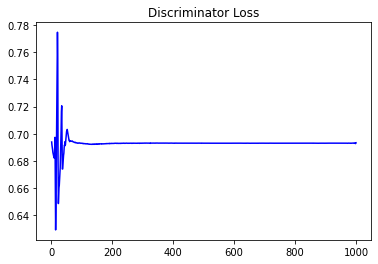

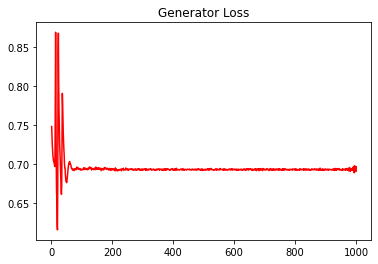

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4096596542306239


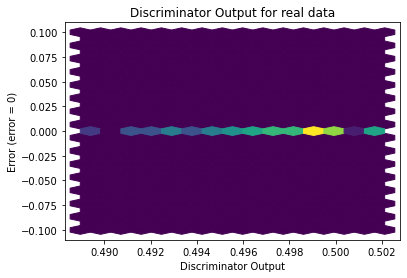

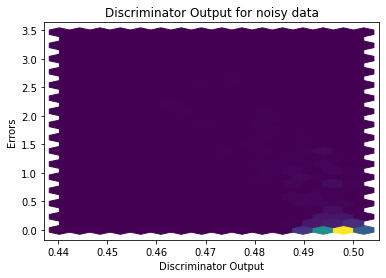

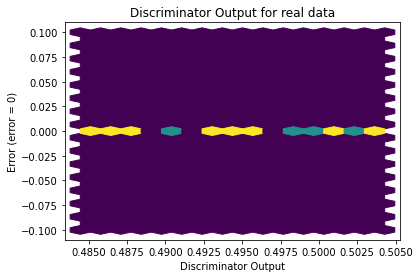

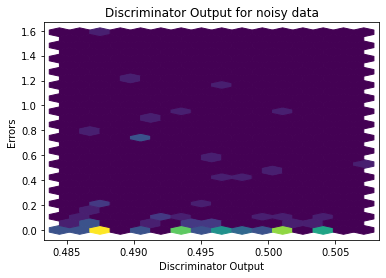

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


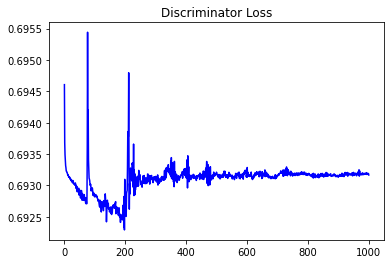

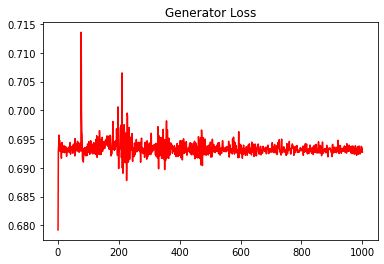

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3966533694448355


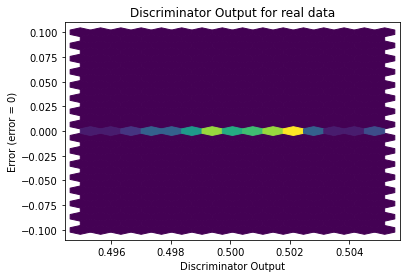

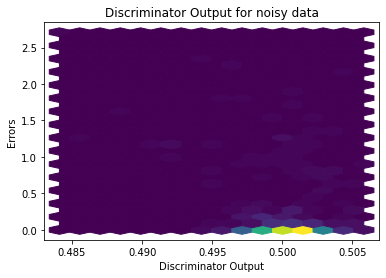

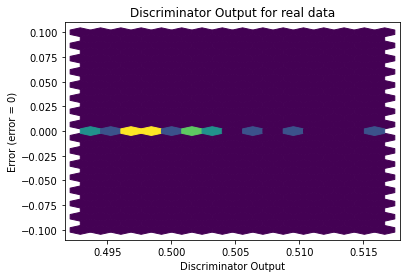

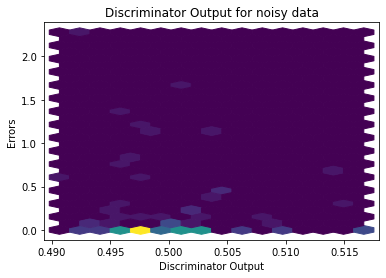

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0675]], requires_grad=True)
